# Mobile Price-Range Classification 

#### Problem Statement

Mobile price classification is a machine learning task that involves categorizing mobile phones into different price ranges based on various features and attributes. The goal of this classification is to group mobile phones into distinct price segments, such as low-budget, mid-budget, high-budget, very high-budget  to aid consumers in making informed decisions according to their budget and requirements.



#### DESCRIPTION DATA:

In [68]:
# Important Libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [91]:
# Imported dataset

df=pd.read_csv('mobile_data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [69]:
# shape of the dataset
# 2000 rows and 21 columns

df.shape

(2000, 21)

In [9]:
# information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# No null values are present in dataset

df.isna().sum().sum()

0

In [11]:
# No duplicated data in dataset

df.duplicated().sum()

0

In [70]:
# Statistical information

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [90]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

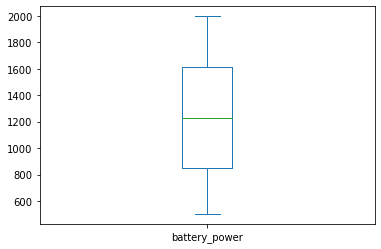

In [129]:
# ploting 'BOXPLOT' for checking outliers of 'Battery_power' feature.
# No such outliers present in battery_power feature

df['battery_power'].plot(kind='box')

In [130]:
# OUTLIERS :

<AxesSubplot:xlabel='clock_speed'>

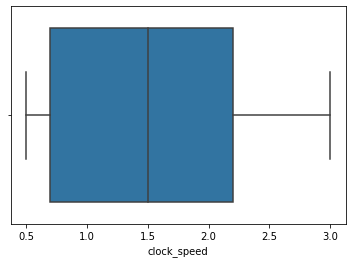

In [131]:
# No such outliers present in 'clock_speed' feature
sns.boxplot(df['clock_speed'])

<AxesSubplot:xlabel='int_memory'>

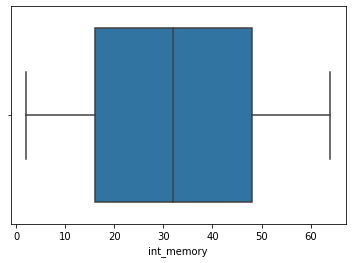

In [132]:
# No such outliers present in 'internal_memory' feature

sns.boxplot(df['int_memory'])

<AxesSubplot:xlabel='mobile_wt'>

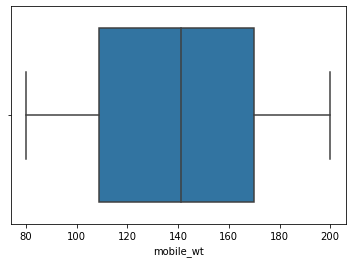

In [133]:
# No such outliers present in 'mobile_weight' feature

sns.boxplot(df['mobile_wt'])

<AxesSubplot:xlabel='px_height'>

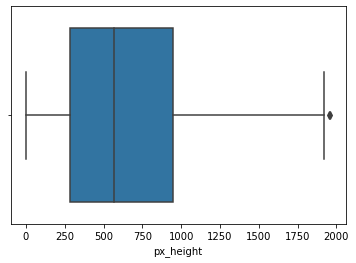

In [134]:
# Only One  outliers present in 'px_height' feature and it will not effect on model

sns.boxplot(df['px_height'])

In [135]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [136]:
# Data is balanced

a=df['price_range'].value_counts()
a

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

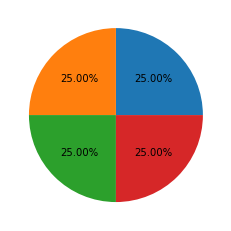

In [137]:
# data is equally spread in 4 categores

plt.pie(a, autopct='%1.2f%%', )
plt.show()

In [138]:
# TO CHECK THE VALUE OF BLUETOOTH FEATURE
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

<AxesSubplot:ylabel='Density'>

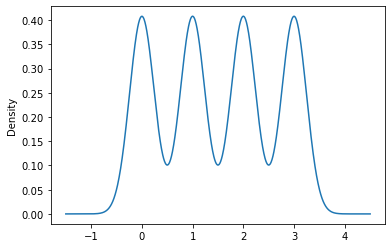

In [139]:
# Line plot on price range feature (output feature)
df['price_range'].plot(kind='kde')

In [140]:
## FEATURE SELECTION BY USING VARIANCE THRESHOLD

In [156]:
from sklearn.feature_selection import VarianceThreshold
vr=VarianceThreshold(threshold=0.10)      

In [157]:
vr.fit(df)

VarianceThreshold(threshold=0.1)

In [158]:
vr.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

All features are highly corelated with output feature except 'm_dep' feature
We have drop the 'm_dep' feature.

In [159]:
# we have dropped m_dep(mobile depth) because its corelation is so week.
df.drop('m_dep', axis=1,inplace=True)   

In [160]:
df.shape

(2000, 20)

In [161]:
# SEPERATION OF X & y

X=df.drop('price_range',axis=1)
y=df['price_range']

In [162]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [163]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [166]:
# FEATURE SCALLING

In [167]:
# TO scalled data in proper manner using 'Standardization method'

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [168]:
# we have scalled X(input features) in proper manner

In [169]:
# Split your data into training and testing part

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X_sc,y,random_state=1,test_size=0.2)

In [170]:
# Data splitted into training and testing part

print(Xtrain.shape)
print(Xtest.shape)

(1600, 19)
(400, 19)


In [171]:
# MODEL BUILDING

In [172]:
# LOGISTIC REGRESSION ALGORITHM

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(multi_class='multinomial', solver='sag')
lg.fit(Xtrain,ytrain)


LogisticRegression(multi_class='multinomial', solver='sag')

In [173]:
print(lg.score(Xtest,ytest))    # Testing accuracy
print(lg.score(Xtrain,ytrain))  # training accuracy

0.95
0.97875


In [174]:
# RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=92)
rf.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=92)

In [175]:
print(rf.score(Xtrain,ytrain))  # training data
print(rf.score(Xtest,ytest))    # testing data

1.0
0.87


In [176]:
# SUPPORT VECTOR MACHINE (SVM)

from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=4,degree=5)
svm.fit(Xtrain,ytrain)

SVC(C=4, degree=5)

In [177]:
print(svm.score(Xtrain,ytrain))  # training data
print(svm.score(Xtest,ytest))    # testing data

1.0
0.885


In [178]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [179]:
print(dt.score(Xtrain,ytrain))  # training data
print(dt.score(Xtest,ytest))    # testing data

1.0
0.85


In [180]:
# KNearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [181]:
print(knn.score(Xtrain,ytrain))  # training data
print(knn.score(Xtest,ytest))    # testing data

0.711875
0.495


In [182]:
# KNN get overfitted 
# It is not best algorithm for building model

In [183]:
## OBSERVATION

# We find accuracy by using 4 different algorithms 
# 1.logisticRegression(LR) 2. KNN, 3.SVM, 4. DT

# We got best accucary on SVM as compare to LR, KNN, DT
# KNN also perform well

In [184]:
# To compare ypred and ytest

ypred=lg.predict(Xtest)
ypred
ytest

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [185]:
# To check accuracy

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [186]:
# To check the report of data 

print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.95      0.90      0.92       101
           2       0.92      0.93      0.92       104
           3       0.96      0.99      0.98       103

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [187]:
# How data is accurately predicted

print(confusion_matrix(ypred,ytest))

[[ 90   2   0   0]
 [  2  91   8   0]
 [  0   3  97   4]
 [  0   0   1 102]]


In [188]:
# FINAL ACCURACY OF MODEL :

print(accuracy_score(ytest,ypred))

0.95


In [189]:
# Proof

In [190]:
# Original Data 

df.sample(1) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1761,1329,1,1.7,0,5,1,23,198,8,6,380,682,2308,11,10,9,1,1,0,1


In [191]:
# Predicted data and Output

project=lg.predict([[931,0,2.5,0,1,0,8,200,3,2.5,22,750,3000,6.7,8,20,0,0,1,]])
project

array([3], dtype=int64)

In [194]:
# 0=(low cost)
# 1=(medium cost)
# 2=(high cost)
# 3=(very high cost).

In [195]:
# We have successfully get good result means our dataset is accurately predicted well.